# Exercises I

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away.

Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.
1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

# Imports

In [4]:
import pandas as pd
import numpy as np

from env import user, password, host

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

In [10]:
dd = pd.read_excel('zillow_data_dictionary.xlsx')

In [11]:
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


# Acquire

Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

In [ ]:
url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
query = '''
            
SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
FROM properties_2017

LEFT JOIN propertylandusetype USING(propertylandusetypeid)

WHERE propertylandusedesc IN ("Single Family Residential",                       
                              "Inferred Single Family Residential")'''

In [8]:
zillow = pd.read_csv('zillow_2017.csv', index_col=0)

In [ ]:
# renaming columns
# df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                                  # 'bathroomcnt':'bathrooms', 
                                  # 'calculatedfinishedsquarefeet':'area',
                                  # 'taxvaluedollarcnt':'tax_value', 
                                  # 'yearbuilt':'year_built',})

In [9]:
zillow.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [ ]:
# tax_value is going to be representative of our target in this case

### Managing Null Values

In [12]:
# get total of null values for each row
zillow.isna().sum()

bedrooms        11
bathrooms       11
area          8485
tax_value      493
year_built    9338
taxamount     4442
fips             0
dtype: int64

**Takeaway**
- Large number of outliers in some columns
- Real estate data may be heavily skewed
- If our plan is to remove outliers, could removing outliers also reduce our null count?

### Visualizing Distributions & Outliers

In [14]:
df = zillow

In [15]:
df.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [17]:
df.fips.value_counts()

6037.0    1431812
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [18]:
df.year_built.value_counts()

1955.0    84405
1950.0    71693
1954.0    69163
1953.0    62342
1956.0    61942
          ...  
1879.0        1
1877.0        1
1855.0        1
1874.0        1
1823.0        1
Name: year_built, Length: 153, dtype: int64

In [21]:
# I'm going to interpret fips and year as discrete categories at this point,
# and presume everything else is fair game for continuous analysis
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

In [22]:
cols

['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

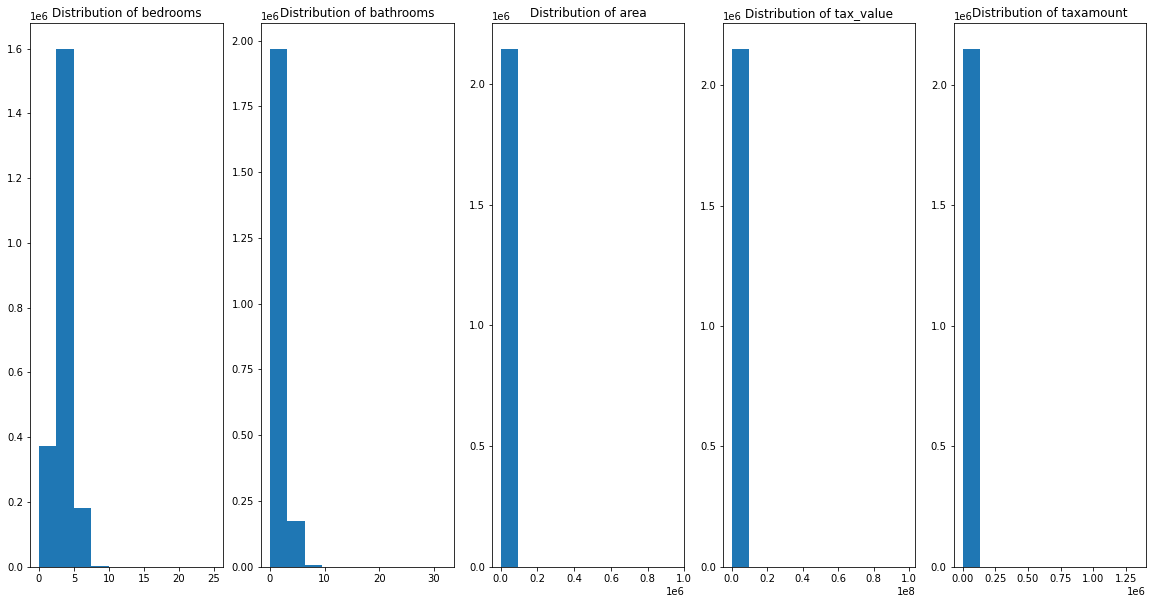

In [29]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

<AxesSubplot:>

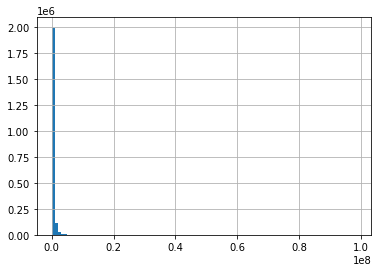

In [27]:
df['tax_value'].hist(bins=100)

<AxesSubplot:>

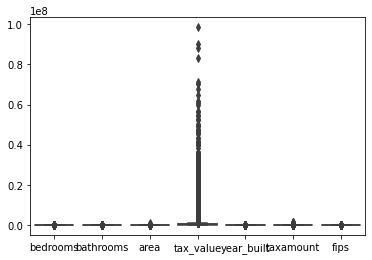

In [28]:
sns.boxplot(data=df)

### Boxplots
Naturally show outliers as black diamonds

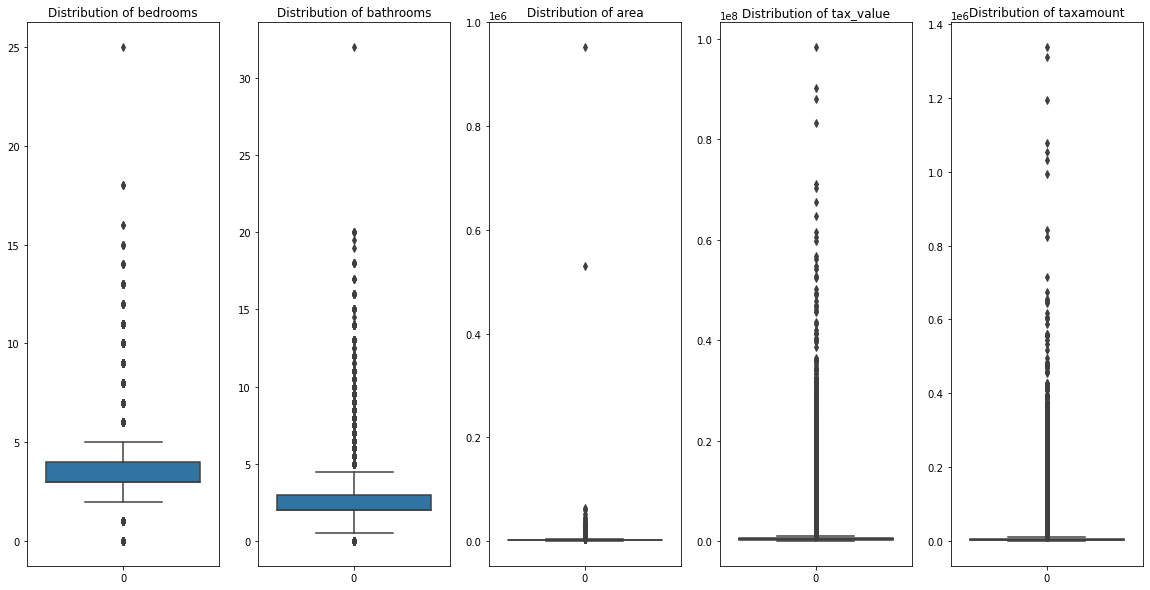

In [31]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

**Takeaways**
- Outliers must exist in each column for the x-axis to have the range shown
- `tax_value` is looking like it has severe skew, due to a x-axis range that goes to 1e8

## Decision time:
 - It looks like I have outliers highly dependent on what properties have over 5+ bedrooms and bathrooms.  If I want to make conclusions and generalizations about the primary/regular housing market, I may make the decision to eliminate outliers based on these homes and analyze specifically homes in the median range of values rather than the extremely high value properties.
 
 "I'm going to remove outliers this time for the same of my MVP, noting that my decisions and analysis are going to center around the mediam homes and I will likely want to examine the high value property market on my next iteration"

What are the quartiles for each of these columns?

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathrooms,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
area,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
tax_value,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [35]:
df['bathrooms'].describe()['25%']

2.0

In [36]:
df['bathrooms'].quantile(0.25)

2.0

In [38]:
# IQR for bathrooms:
iqr = df['bathrooms'].quantile(0.75) - df['bathrooms'].quantile(0.25)

In [39]:
lower_bathroom_fence = df['bathrooms'].quantile(0.25) - (1.5*iqr)

In [40]:
lower_bathroom_fence

0.5

In [41]:
upper_bathroom_fence = df['bathrooms'].quantile(0.75) + (1.5*iqr)

In [42]:
upper_bathroom_fence

4.5

In [45]:
df[(df.bathrooms > lower_bathroom_fence) & (df.bathrooms < upper_bathroom_fence)].bathrooms.describe()

count    2.065622e+06
mean     2.131432e+00
std      7.741102e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64

In [47]:
col_qs = {}
for col in cols:
    col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])

In [50]:
col_qs['bedrooms'][0.25]

3.0

In [58]:
def remove_outliers(df, col_list, k=1.5):
    '''
    remove outliers from a dataframe based on a list of columns
    using the tukey method.
    returns a single dataframe with outliers removed
    '''
    col_qs = {}
    for col in col_list:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
    for col in col_list:
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (k*iqr)
        upper_fence = col_qs[col][0.75] + (k*iqr)
        print(type(lower_fence))
        print(lower_fence)
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [59]:
smol_df = remove_outliers(df, cols)

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [62]:
df.shape

(2152864, 7)

In [61]:
smol_df.shape

(1907777, 7)

In [66]:
df.shape[0] - smol_df.shape[0]

245087

In [69]:
round((df.shape[0] - smol_df.shape[0])/ df.shape[0] * 100, 2)

11.38

In [67]:
smol_df.shape

(1907777, 7)

In [70]:
smol_df.isna().sum()

bedrooms        0
bathrooms       0
area            0
tax_value       0
year_built    904
taxamount       0
fips            0
dtype: int64

In [64]:
smol_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907777 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1907777 non-null  float64
 1   bathrooms   1907777 non-null  float64
 2   area        1907777 non-null  float64
 3   tax_value   1907777 non-null  float64
 4   year_built  1906873 non-null  float64
 5   taxamount   1907777 non-null  float64
 6   fips        1907777 non-null  float64
dtypes: float64(7)
memory usage: 116.4 MB


**Takeaways**
- Substantial outliers exist
- If we presume that we are going to use our data to build a model that focuses on median home values, then we can drop these outliers.
- This may also help with our null value issue

### Revisualize Distributions
Lets revisualize our data now that its be cleaned a bit (approximately 300,000 observations removed):

In [71]:
df = smol_df

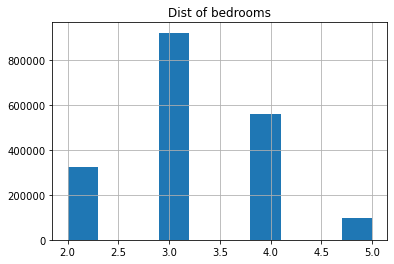

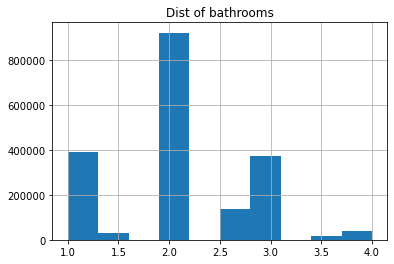

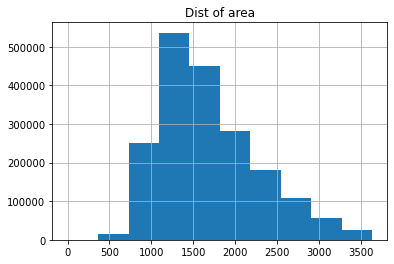

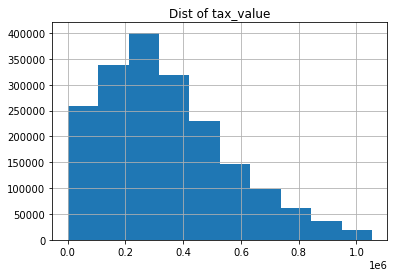

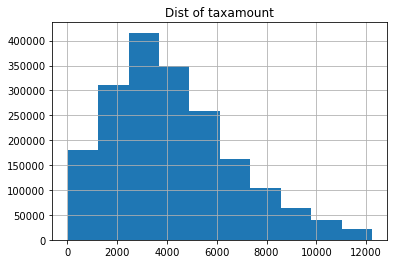

In [77]:
for col in cols:
    df[col].hist()
    plt.title(f'Dist of {col}')
    plt.show()
    print('==========')

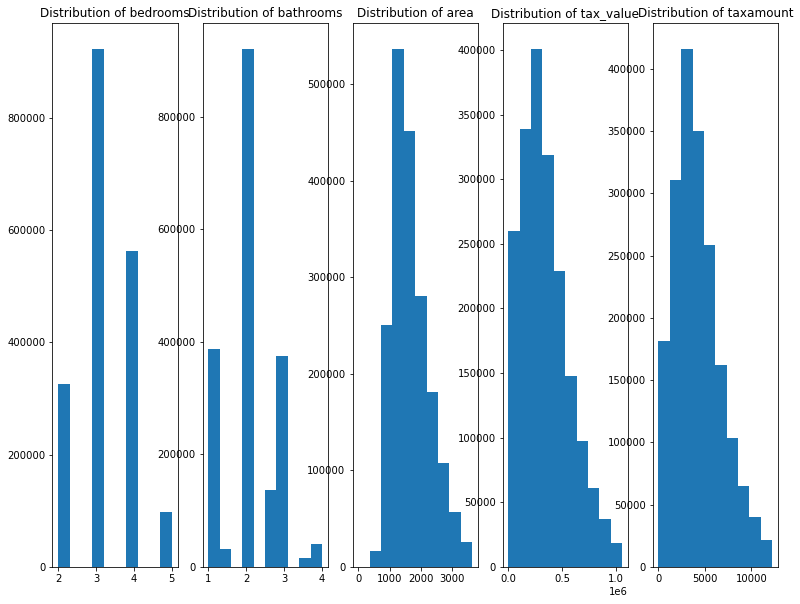

In [76]:
plt.figure(figsize=(13,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

Takeaways 
* Bedrooms and bathrooms are not normally distributed
* Other fields are skewed, but are at least approaching a more normal distribution

Takeaways 
* Still a few outliers despite the relatively restrictive 1.5 * IQR setting for the upper/lower boundary
* No need to remove these outliers

### How do the null values look now?

* The null values have been cleaned up by removing the outliers
* The mean, median, and mode are all relatively similar to each other
* We could try and develop a complex imputation method to estimate the year built based off other columns, but for speed, we will just use the median.

In [87]:
round(df['year_built'].isna().sum() / len(df), 9)

0.00047385

In [78]:
df.isna().sum()

bedrooms        0
bathrooms       0
area            0
tax_value       0
year_built    904
taxamount       0
fips            0
dtype: int64

In [83]:
len(df), df.shape[0]

(1907777, 1907777)

In [ ]:
df

In [92]:
# missing_percent = 0.98
missing_thresh = 0.05
exclude_missing = []
num_rows = df.shape[0]
for c in df.columns:
    # calculate the missing values
    num_missing = df[c].isna().sum()
    # make the ratio of the number missing over all values
    missing_frac = num_missing / num_rows
    # if missing values fraction is greater than the missing thresh:
    if missing_frac > missing_thresh:
        exclude_missing.append(c)
        

In [93]:
exclude_missing

['year_built']

In [82]:
df.drop(columns=exclude_missing)

In [ ]:
# Notes for ourselves: we only have the one column with missing info,
# and its a pretty small number of values,
# So i'm going to ahead and choose to use an imputer for these values

### What if removing the outliers didn't clean up our nulls? What would we do then?

`.dropna()`
We can utilize some of the parameters of .dropna() to clean up our nulls:

- axis: {0 or ‘index’, 1 or ‘columns’}, default 0
    - 0, or ‘index’ : Drop rows which contain missing values.
    - 1, or ‘columns’ : Drop columns which contain missing value.
- how: {‘any’, ‘all’}, default ‘any’
    - ‘any’ : If any NA values are present, drop that row or column.
    - ‘all’ : If all values are NA, drop that row or column.
- thresh: int, optional
    - Require that many non-NA values.
- subset: array-like, optional
    - Give the columns to consider, ignore non-listed columns

Thresh is useful, but it is limited to an integer amount. What if we wanted to remove columns that had a certain proportion of na values?

### Are the column data types correct?

In [95]:
for col in df.columns:
    print(f'Column: {col}')
    print(df[col].describe())
    print('==============')

Column: bedrooms
count    1.907777e+06
mean     3.226660e+00
std      7.864515e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: bedrooms, dtype: float64
Column: bathrooms
count    1.907777e+06
mean     2.075743e+00
std      7.213485e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.500000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64
Column: area
count    1.907777e+06
mean     1.680690e+03
std      5.923135e+02
min      1.000000e+00
25%      1.239000e+03
50%      1.562000e+03
75%      2.024000e+03
max      3.634000e+03
Name: area, dtype: float64
Column: tax_value
count    1.907777e+06
mean     3.418999e+05
std      2.155824e+05
min      2.200000e+01
25%      1.775200e+05
50%      3.034080e+05
75%      4.676380e+05
max      1.054000e+06
Name: tax_value, dtype: float64
Column: year_built
count    1.906873e+06
mean     1.959753e+03
std      2.079616e+01
min      1.801000e+03
2

* casting fips and year built as an object because it is a numerical represintation of a catagorical value
* leaving the rest as floats

In [96]:
# fixing the year values that are missing

In [98]:
year_imputer = SimpleImputer()
year_imputer.fit(df[['year_built']])

SimpleImputer()

In [100]:
df['year_built'] = year_imputer.transform(df[['year_built']])

In [102]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907777 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1907777 non-null  float64
 1   bathrooms   1907777 non-null  float64
 2   area        1907777 non-null  float64
 3   tax_value   1907777 non-null  float64
 4   year_built  1907777 non-null  float64
 5   taxamount   1907777 non-null  float64
 6   fips        1907777 non-null  float64
dtypes: float64(7)
memory usage: 116.4 MB


## Target Leakage

Consider the goal of the model to be developed:

        Build an end-to-end project in which you use some of their Kaggle data to predict property values

`taxamount` is determined by a real estate tax appraisers valuation of the home combined with the local tax rate.

The question to consider, does this represent information that we wouldn't have at the time of prediction? Does this represent the target variable? This is where specific domain knowledge is very important.

Tax appraised values often deviate from the sale price of a property due to a number of reasons:
- Unlike market value, homeowners are incentivized to reduce their tax value appraisal. As a result, some homeowners may misrepresent the features/size of their property to avoid a bigger tax bill
- Some counties limit the tax appraisal increase to a set amount, causing tax appraised value to significantly lag behind home values in hot markets
- Local tax appraisers evaluate homes based on evaluation criteria that can differ from county to county or even year to year based on political and administrative pressures

This data is a snapshot of home information in 2017. There is an additional column in the database containing assessment year. This might be useful to know the recency of any given taxamount value. 

When a home is being appraised to evaluate for market pricing, prior years home value is not considered in that price determination. That doesn't mean that prior years home value is not predictive of price. It could be. For this reason, we will allow `taxamount` to remain in the dataset. 

Without this specific domain knowledge, this column seems to represent the risk of target leak. If you are in a situation where you don't know if you have a target leak situation, its probably generally better to err on the side of caution.

## Split the data

In [ ]:
# I did the imputation before the split for the sake of demonstration
# note that we would not do this in production, 
# hence its not reflected in my wrangle.py :)

In [ ]:
'''Wrangles data from Zillow Database'''

##################################################Wrangle.py###################################################

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host

#**************************************************Acquire*******************************************************

def acquire_zillow():
    ''' Acquire data from Zillow using env imports and rename columns'''
    
    url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
    query = """
            
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017

    LEFT JOIN propertylandusetype USING(propertylandusetypeid)

    WHERE propertylandusedesc IN ("Single Family Residential",                       
                                  "Inferred Single Family Residential")"""

    # get dataframe of data
    df = pd.read_sql(query, url)
    
    
    # renaming column names to one's I like better
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'area',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'year_built',})
    return df

#**************************************************Remove Outliers*******************************************************

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

#**************************************************Distributions*******************************************************

def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'year_built']]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=5)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        plt.tight_layout()

    plt.show()
        
        
def get_box(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()
        
#**************************************************Prepare*******************************************************

def prepare_zillow(df):
    ''' Prepare zillow data for exploration'''

    # removing outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
    
    # get distributions of numeric data
    get_hist(df)
    get_box(df)
    
    # converting column datatypes
    df.fips = df.fips.astype(object)
    df.year_built = df.year_built.astype(object)
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    # impute year built using mode
    imputer = SimpleImputer(strategy='median')

    imputer.fit(train[['year_built']])

    train[['year_built']] = imputer.transform(train[['year_built']])
    validate[['year_built']] = imputer.transform(validate[['year_built']])
    test[['year_built']] = imputer.transform(test[['year_built']])       
    
    return train, validate, test    


#**************************************************Wrangle*******************************************************


def wrangle_zillow():
    '''Acquire and prepare data from Zillow database for explore'''
    train, validate, test = prepare_zillow(acquire_zillow())
    
    return train, validate, test

In [105]:
import wrangle_zillow

local version found!


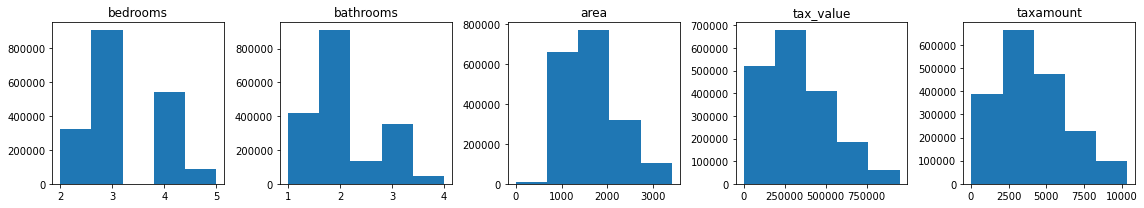

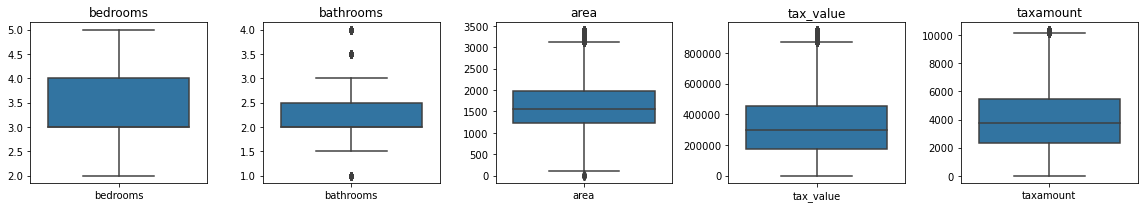

In [106]:
train, val, test = wrangle_zillow.wrangle_zillow()

In [108]:
train.shape, val.shape, test.shape

((1038959, 7), (445269, 7), (371057, 7))